# Exploratory data analysis

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
weather = pd.read_json("../data/Seasonal_weather_data.json")

In [3]:
weather.head()

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
0,Amsterdam,85,14,7,17.0,98.0,49,13,5,15.0,...,64,21,12,13.0,203.0,60,6,1,16.0,59.0
1,Athens,37,23,16,8.0,212.0,27,20,12,9.0,...,6,31,22,2.0,347.0,51,14,8,13.0,131.0
2,Belgrade,48,18,8,7.0,153.0,60,18,8,9.0,...,69,26,16,8.0,266.0,50,5,-1,8.0,74.0
3,Berlin,44,13,6,9.0,109.0,45,13,4,9.0,...,63,23,12,10.0,219.0,45,3,-2,10.0,55.0
4,Bern,79,13,5,9.0,119.0,87,13,3,12.0,...,113,23,11,11.0,213.0,64,3,-3,10.0,64.0


## 1. City segmentation based on warm summers (sunshine hours and high temperatures in summer)

In [4]:
weather.isna().sum()

city                0
autumn_prec_mm      0
autumn_high         0
autumn_low          0
autumn_prec_days    1
autumn_sun_hrs      1
spring_prec_mm      0
spring_high         0
spring_low          0
spring_prec_days    1
spring_sun_hrs      1
summer_prec_mm      0
summer_high         0
summer_low          0
summer_prec_days    1
summer_sun_hrs      1
winter_prec_mm      0
winter_high         0
winter_low          0
winter_prec_days    1
winter_sun_hrs      1
dtype: int64

In [5]:
# Dropping Monaco because it has no data
weather.loc[weather["autumn_prec_days"].isna()]

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
17,Monaco,0,0,0,NaN,NaN,0,0,0,NaN,...,0,0,0,NaN,NaN,0,0,0,NaN,NaN


In [6]:
# Dropping Prague because the data is inaccurate
weather.loc[weather["city"] == "Prague"]

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
21,Prague,75,19,8,10.0,215.0,24,4,-3,6.0,...,35,11,1,7.0,153.0,40,7,0,8.0,106.0


In [7]:
weather.drop([0,17]).reset_index(drop=True).isna().sum()

city                0
autumn_prec_mm      0
autumn_high         0
autumn_low          0
autumn_prec_days    0
autumn_sun_hrs      0
spring_prec_mm      0
spring_high         0
spring_low          0
spring_prec_days    0
spring_sun_hrs      0
summer_prec_mm      0
summer_high         0
summer_low          0
summer_prec_days    0
summer_sun_hrs      0
winter_prec_mm      0
winter_high         0
winter_low          0
winter_prec_days    0
winter_sun_hrs      0
dtype: int64

In [8]:
weather = weather.drop(weather.index[[17,21]]).reset_index(drop=True)

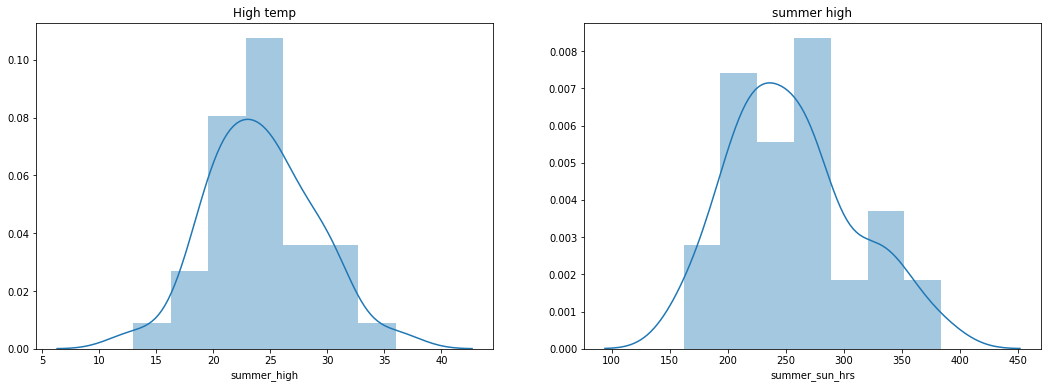

In [9]:
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(18,6))

sns.distplot(weather["summer_high"], ax=ax[0]);
ax[0].set_title("High temp");

sns.distplot(weather["summer_sun_hrs"], ax=ax[1]);
ax[1].set_title("sunshine hours");

plt.title("summer high");

In [10]:
summer_high_desc = weather.sort_values("summer_high", ascending=False)

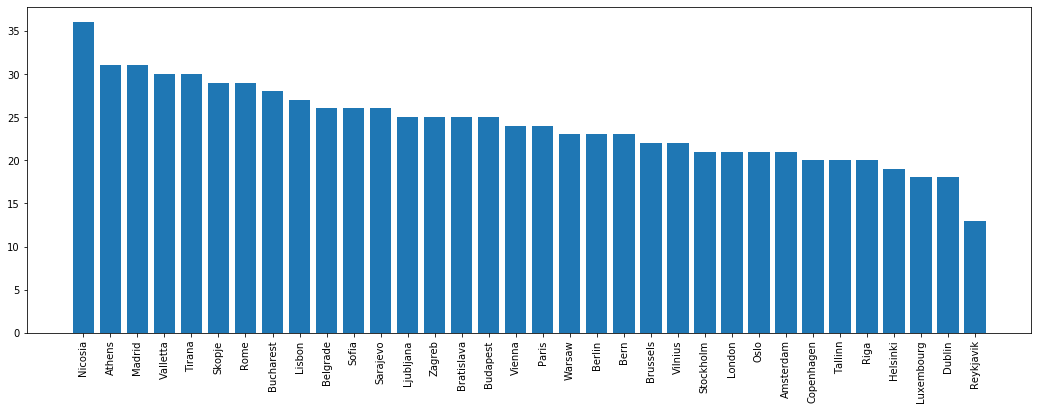

In [11]:
plt.subplots(figsize=(18,6))
plt.bar(summer_high_desc["city"], summer_high_desc["summer_high"])
plt.xticks(rotation="vertical");

# sns.barplot(x="city", y="summer_high", hue="summer_high", data=weather);

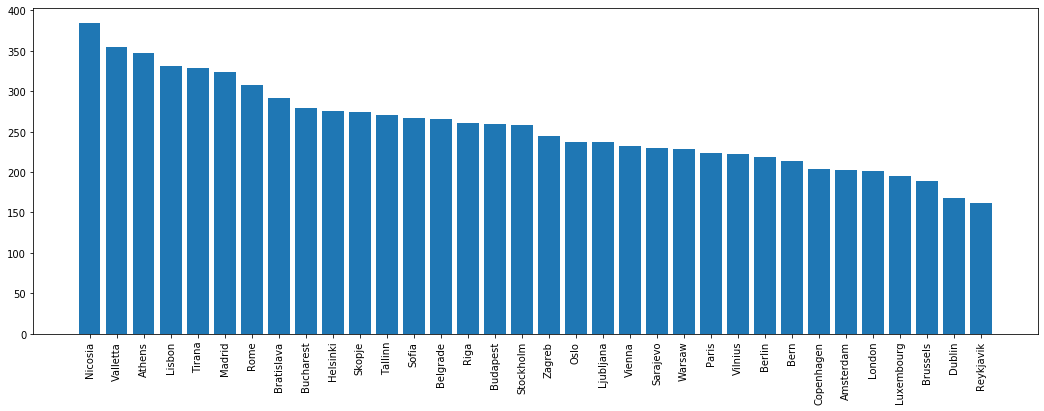

In [12]:
summer_sun_desc = weather.sort_values("summer_sun_hrs", ascending=False)

plt.subplots(figsize=(18,6))
plt.bar(summer_sun_desc["city"], summer_sun_desc["summer_sun_hrs"])
plt.xticks(rotation="vertical");


In [13]:
summer_high_desc.head()

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
17,Nicosia,21,28,15,4.0,273.0,29,24,11,5.0,...,5,36,21,1.0,384.0,54,16,6,11.0,187.0
1,Athens,37,23,16,8.0,212.0,27,20,12,9.0,...,6,31,22,2.0,347.0,51,14,8,13.0,131.0
16,Madrid,37,21,8,5.0,202.0,36,19,6,6.0,...,16,31,15,3.0,324.0,38,12,1,6.0,140.0
29,Valletta,70,24,17,8.0,229.0,24,20,12,6.0,...,3,30,20,1.0,355.0,87,16,10,13.0,169.0
28,Tirana,127,22,10,10.0,193.0,95,20,8,10.0,...,42,30,17,5.0,329.0,131,13,3,11.0,115.0


## 2. Kmeans Clustering

In [14]:
X = weather[["summer_sun_hrs", "summer_high"]]
clusters = KMeans(n_clusters=3)
clusters.fit(X)

KMeans(n_clusters=3)

In [15]:
clusters.predict(X)

array([1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0], dtype=int32)

In [16]:
X.assign(cluster=clusters.predict(X))

,summer_sun_hrs,summer_high,cluster
0,203.0,21,1
1,347.0,31,2
2,266.0,26,0
3,219.0,23,1
4,213.0,23,1
5,292.0,25,0
6,189.0,22,1
7,279.0,28,0
8,259.0,25,0
9,204.0,20,1


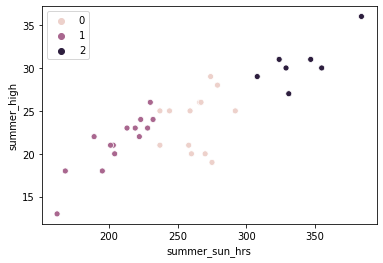

In [17]:
sns.scatterplot(data=X,
                x="summer_sun_hrs",
                y="summer_high",
                hue=clusters.predict(X));

## 3. Elbow plot - optimal no. of clusters 

In [18]:
def plot_elbow(X):
    inertias = {}
    for k in range(1,15):
        cl = KMeans(n_clusters=k).fit(X)
        inertias[k] = cl.inertia_

    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters")

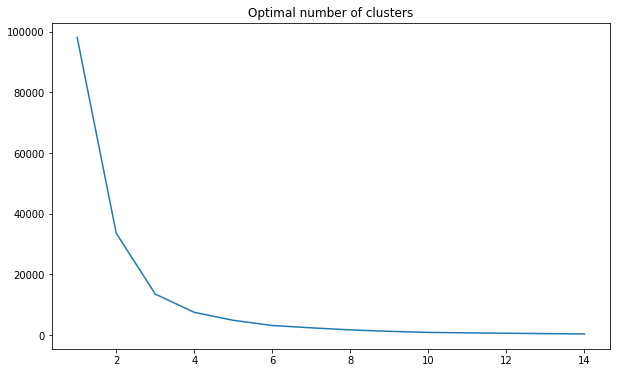

In [19]:
plot_elbow(X)

In [20]:
weather2 = weather.assign(cluster=clusters.predict(X))
weather2[["city", "cluster"]].head()

,city,cluster
0,Amsterdam,1
1,Athens,2
2,Belgrade,0
3,Berlin,1
4,Bern,1


In [21]:
cluster0 = weather2.loc[weather2["cluster"] == 0]
clu_0 = list(cluster0["city"])

In [22]:
cluster1 = weather2.loc[weather2["cluster"] == 1]
clu_1 = list(cluster1["city"])

In [23]:
cluster2 = weather2.loc[weather2["cluster"] == 2]
clu_2 = list(cluster2["city"])

These are the clusters for summer in terms of sunshine hours and high temperatures. Cities are grouped by the most similar summers.

In [24]:
print(clu_0)
print("--------------------------------------------------------------------------------------------")
print(clu_1)
print("--------------------------------------------------------------------------------------------")
print(clu_2)

['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Ljubljana', 'Oslo', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Zagreb']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Paris', 'Reykjavik', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']


## 4. Trying similar clustering for winter

In [25]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

In [26]:
X2 = weather[["winter_sun_hrs", "winter_high"]]
clusters = KMeans(n_clusters=4)
clusters.fit(X2)

KMeans(n_clusters=4)

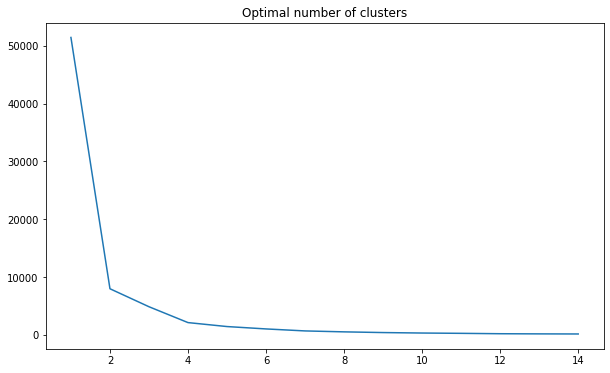

In [27]:
plot_elbow(X2)

In [28]:
clusters.predict(X2)

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 3, 2, 0, 1, 3, 1, 1,
       2, 3, 3, 3, 1, 1, 2, 0, 3, 1, 1, 3], dtype=int32)

In [29]:
weather3 = weather.assign(cluster=clusters.predict(X2))
weather3[["city", "cluster"]]

,city,cluster
0,Amsterdam,3
1,Athens,2
2,Belgrade,3
3,Berlin,3
4,Bern,3
5,Bratislava,3
6,Brussels,3
7,Bucharest,3
8,Budapest,3
9,Copenhagen,1


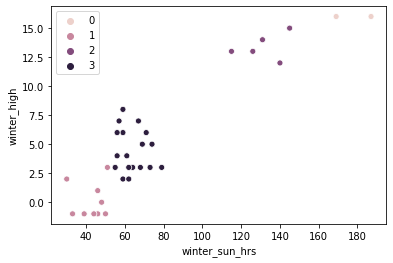

In [30]:
sns.scatterplot(data=X2,
                x="winter_sun_hrs",
                y="winter_high",
                hue=clusters.predict(X2));

In [31]:
cluster0 = weather3.loc[weather3["cluster"] == 0]
clu_0 = list(cluster0["city"])

In [32]:
cluster1 = weather3.loc[weather3["cluster"] == 1]
clu_1 = list(cluster1["city"])

In [33]:
cluster2 = weather3.loc[weather3["cluster"] == 2]
clu_2 = list(cluster2["city"])

In [34]:
cluster3 = weather3.loc[weather3["cluster"] == 3]
clu_3 = list(cluster3["city"])

In [35]:
print(clu_0)
print("--------------------------------------------------------------------------------------------")
print(clu_1)
print("--------------------------------------------------------------------------------------------")
print(clu_2)
print("--------------------------------------------------------------------------------------------")
print(clu_3)

['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Copenhagen', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Paris', 'Sarajevo', 'Skopje', 'Sofia', 'Vienna', 'Zagreb']


## 5. Checking for correlations

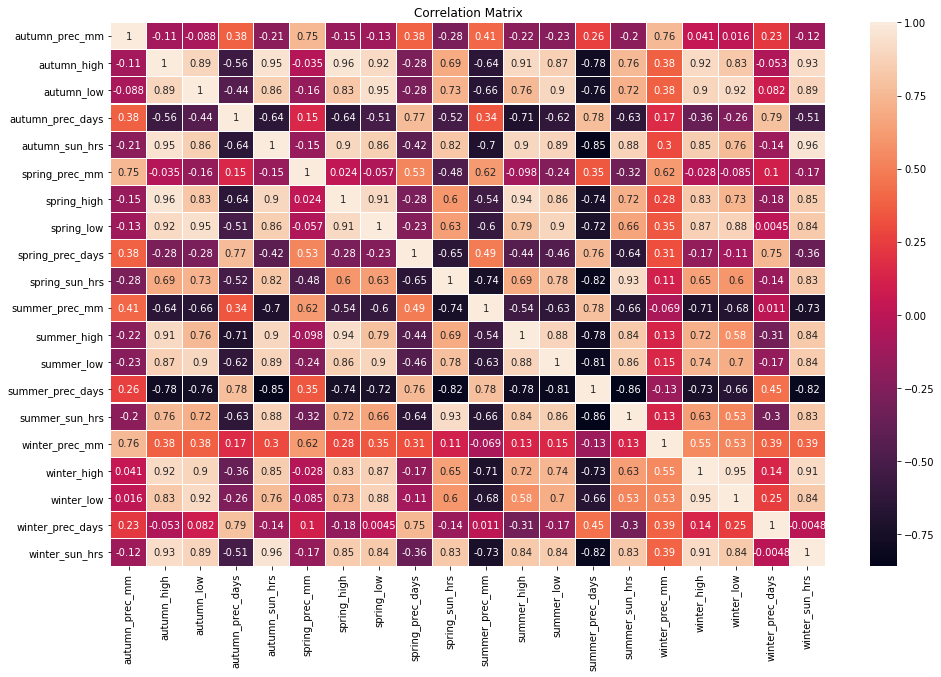

In [36]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(weather.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

In [37]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

In [38]:
weather_subset = weather[["city", 'autumn_high', 'autumn_prec_days', 'autumn_sun_hrs',
        'spring_high','spring_prec_days', 'spring_sun_hrs',
        'summer_high', 'summer_prec_days', 'summer_sun_hrs',
        'winter_high', 'winter_prec_days', 'winter_sun_hrs']]

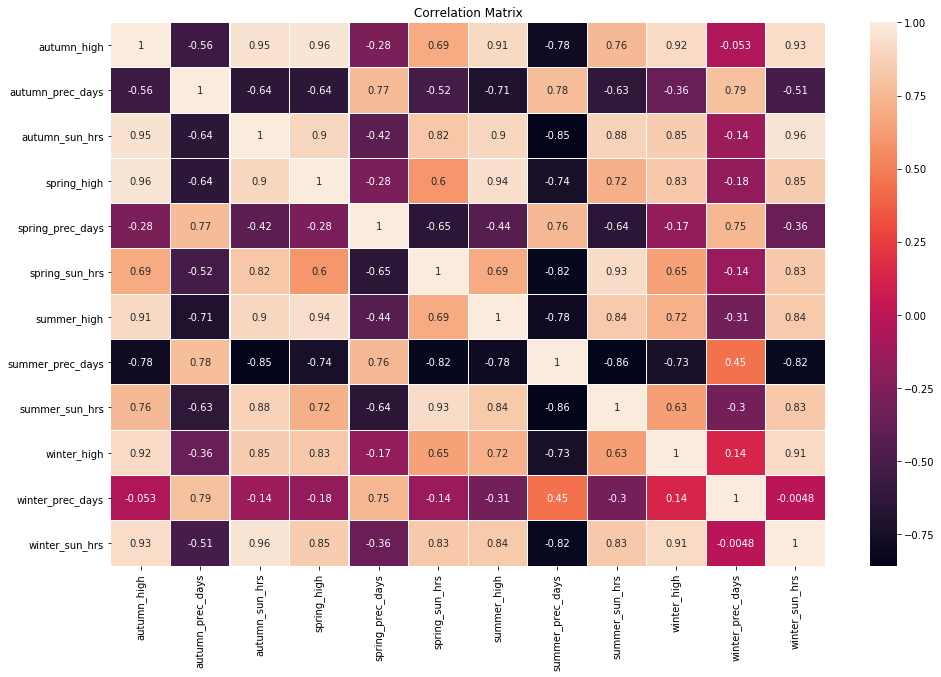

In [39]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(weather_subset.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

### 5.1 we have a wierd negative correlation, winter_sun_hrs and summer_prec_days, let's investigate what's happening

In [40]:
X4 = weather[["winter_sun_hrs", "summer_prec_days"]]

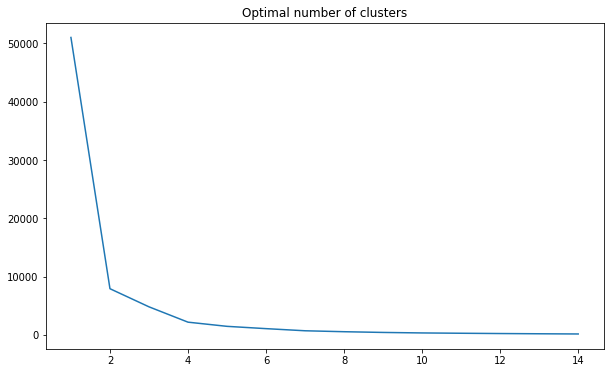

In [41]:
plot_elbow(X4)

In [42]:
def get_elbow(df, col1, col2):
    X = df[[col1, col2]]
    plot_elbow(X)

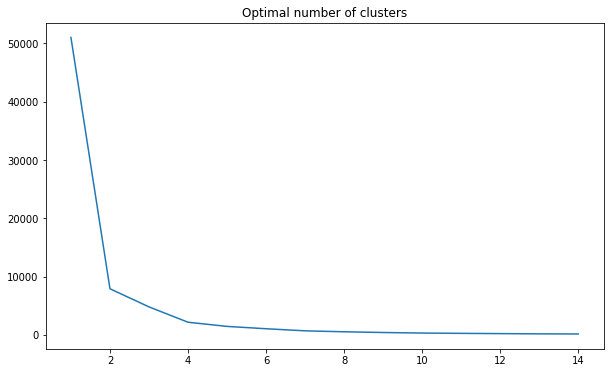

In [43]:
get_elbow(weather, "winter_sun_hrs", "summer_prec_days")

In [44]:
def check_clusters(df, col1, col2, cluster_no):
    X = df[[col1, col2]]
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2[["city", "cluster"]]
    
    sns.scatterplot(data=X,
                x=col1,
                y=col2,
                hue=clusters.predict(X));
    return df2
    
    

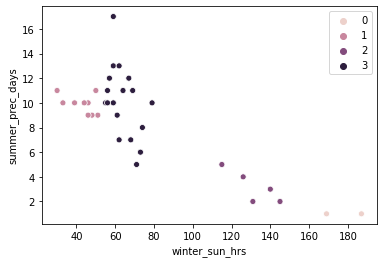

In [45]:
weather5 = check_clusters(weather, "winter_sun_hrs", "summer_prec_days", 4)

In [46]:
def get_city_list(df):
    # 1. get number of clusters
    # for loop to create lists (for i in range(0, n)), assigning unique variable names
    # 2. and then after lists are created
    # a list comprehension for each new list appending the cities in each clusters
    
    
    cluster0 = []
    cluster1 = []
    cluster2 = []
    cluster3 = []
    
    cluster0 = (df.loc[df["cluster"] == 0])
    clu_0 = list(cluster0["city"])
    
    cluster1 = (df.loc[df["cluster"] == 1])
    clu_1 = list(cluster1["city"])
    
    cluster2 = (df.loc[df["cluster"] == 2])
    clu_2 = list(cluster2["city"])
    
    cluster3 = (df.loc[df["cluster"] == 3])
    clu_3 = list(cluster3["city"])
    
    print(clu_0)
    print("--------------------------------------------------------------------------------------------")
    print(clu_1)
    print("--------------------------------------------------------------------------------------------")
    print(clu_2)
    print("--------------------------------------------------------------------------------------------")
    print(clu_3)

In [47]:
get_city_list(weather5)

['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Copenhagen', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Paris', 'Sarajevo', 'Skopje', 'Sofia', 'Vienna', 'Zagreb']


# 1. Possible MVP

### Write a function that takes a city name and poops out the cities that are similar.
### 1.1 Start with weather
### 1.2 find out the clustering
 - we create the feature options (ie. similar summers = sunshine_hours + high_temperatures")

### 1.3 create feature list (designed by us)
 - function: give me the city and 2 weather custom_metric, and we will give you a list of similar cities based on your input
 

# 2. Then following options
- get socio-economic features
- get venue features

#### use-case
- let's say you want to live in a safe, sunshiney city, and don't care about the money
- features = safety index (soc_ec) and sunshine_hrs (weather)

#### Key
- feature = 1 column from the data
- custom_metric = defined by us, is a combination of (2 or more) variables

In [51]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

In [92]:
def weather_rec(city, pref1, pref2):
    
    df = check_clusters(weather, pref1, pref2, 4)
    cluster = df.loc[df["city"] == city]["cluster"].item()
    
    recommendations = (df.loc[df["cluster"] == cluster])
    rec_list = list(recommendations["city"])
    
    return rec_list

['Berlin',
 'Bern',
 'Ljubljana',
 'Oslo',
 'Paris',
 'Sarajevo',
 'Vienna',
 'Vilnius',
 'Warsaw',
 'Zagreb']

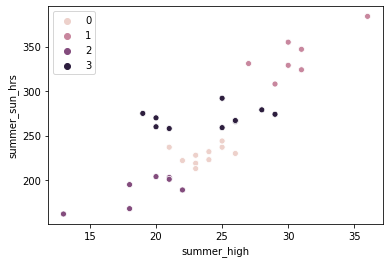

In [93]:
# cluster should be 3
weather_rec("Berlin", "summer_high", "summer_sun_hrs")

In [102]:
list(weather.columns)

['city',
 'autumn_prec_mm',
 'autumn_high',
 'autumn_low',
 'autumn_prec_days',
 'autumn_sun_hrs',
 'spring_prec_mm',
 'spring_high',
 'spring_low',
 'spring_prec_days',
 'spring_sun_hrs',
 'summer_prec_mm',
 'summer_high',
 'summer_low',
 'summer_prec_days',
 'summer_sun_hrs',
 'winter_prec_mm',
 'winter_high',
 'winter_low',
 'winter_prec_days',
 'winter_sun_hrs']

In [97]:
new_weather = weather[['city', 'autumn_high', 'autumn_prec_days', 'autumn_sun_hrs', 
        'spring_high', 'spring_prec_days', 'spring_sun_hrs',
        'summer_high', 'summer_prec_days', 'summer_sun_hrs', 
        'winter_high', 'winter_prec_days', 'winter_sun_hrs']]

In [111]:
test_list = weather[['city', 'autumn_high']]



In [126]:
def check_allclusters(df, col_list, cluster_no):
    X = df[col_list]
    X = X.drop("city", 1)
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2[["city", "cluster"]]
    
    city_list = get_city_list(df2)
    
    return city_list

In [128]:
# function now outputs city list
check_allclusters(new_weather, list(new_weather.columns), 4)

['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Oslo', 'Paris', 'Reykjavik', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw']


In [120]:
# all weather data
get_city_list(all_clusters)

['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Zagreb']
--------------------------------------------------------------------------------------------
['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Oslo', 'Paris', 'Reykjavik', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw']


#### There are variations in clusters if we subset by different categories, e.g. 'Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta' have similar winters, but ['Nicosia', 'Valletta'] have warmer, sunnier summers

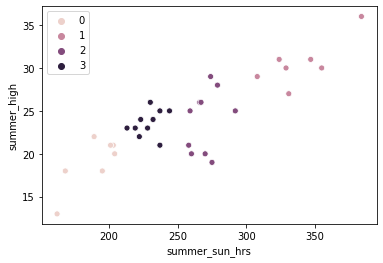

In [125]:
summer_4 = check_clusters(weather, "summer_sun_hrs", "summer_high", 4)
# get_city_list(summer_4)

In [131]:
check_allclusters(new_weather, list(new_weather[["city","summer_high"]]), 4)

['Athens', 'Bucharest', 'Madrid', 'Nicosia', 'Rome', 'Skopje', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Helsinki', 'London', 'Luxembourg', 'Oslo', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius']
--------------------------------------------------------------------------------------------
['Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Budapest', 'Lisbon', 'Ljubljana', 'Paris', 'Sarajevo', 'Sofia', 'Vienna', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Reykjavik']


In [132]:
check_allclusters(new_weather, list(new_weather[["city","summer_sun_hrs"]]), 4)

['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Reykjavik']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn']
--------------------------------------------------------------------------------------------
['Berlin', 'Bern', 'Ljubljana', 'Oslo', 'Paris', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']


In [133]:
check_allclusters(new_weather, list(new_weather[["city","summer_prec_days"]]), 4)

['Belgrade', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'Helsinki', 'Ljubljana', 'Oslo', 'Reykjavik', 'Riga', 'Sarajevo', 'Sofia', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Bratislava', 'Bucharest', 'Budapest', 'Rome', 'Skopje', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'London', 'Luxembourg', 'Paris', 'Vienna']


In [142]:
def check_one_clusters(df, col, cluster_no):
    X = df[["city", col]]
    X = X.drop("city", 1)
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2 = df2[["city", "cluster", col]]
    
    # city_list = get_city_list_one(df2)
    
    return df2

In [141]:
def get_city_list_one(df):
    
    cluster0 = (df.loc[df["cluster"] == 0])
    clu_0 = list(cluster0["city", ])
    
    cluster1 = (df.loc[df["cluster"] == 1])
    clu_1 = list(cluster1["city"])
    
    cluster2 = (df.loc[df["cluster"] == 2])
    clu_2 = list(cluster2["city"])
    
    cluster3 = (df.loc[df["cluster"] == 3])
    clu_3 = list(cluster3["city"])
    
    print(clu_0)
    print("--------------------------------------------------------------------------------------------")
    print(clu_1)
    print("--------------------------------------------------------------------------------------------")
    print(clu_2)
    print("--------------------------------------------------------------------------------------------")
    print(clu_3)

In [140]:
check_one_clusters(new_weather, "summer_high", 4)

,city,cluster,summer_high
0,Amsterdam,3,21
1,Athens,2,31
2,Belgrade,1,26
3,Berlin,1,23
4,Bern,1,23
5,Bratislava,1,25
6,Brussels,3,22
7,Bucharest,2,28
8,Budapest,1,25
9,Copenhagen,3,20
